# Pandas进阶
<table align="left">
  <td>
    <a target="_blank" href="http://nbviewer.ipython.org/github/ShowMeAI-Hub/awesome-AI-cheatsheets/blob/main/Pandas/pandas进阶-cheatsheet-code.ipynb"><img src="https://raw.githubusercontent.com/jupyter/design/master/logos/Badges/nbviewer_badge.svg" />在nbviewer上查看notebook</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/ShowMeAI-Hub/awesome-AI-cheatsheets/blob/main/Pandas/pandas进阶-cheatsheet-code.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" />在Google Colab运行</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/ShowMeAI-Hub/awesome-AI-cheatsheets/Pandas/pandas进阶-cheatsheet-code.ipynb"><img src="https://badgen.net/badge/open/github/color=cyan?icon=github" />在Github上查看源代码</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/ShowMeAI-Hub/awesome-AI-cheatsheets/Pandas/pandas进阶-速查表.pdf"><img src="https://badgen.net/badge/download/pdf/color=white?icon=github"/>下载速查表</a>
  </td>
</table>

## 说明
**notebook by [韩信子](https://github.com/HanXinzi-AI)@[ShowMeAI](https://github.com/ShowMeAI-Hub)**

更多AI速查表资料请查看[速查表大全](https://github.com/ShowMeAI-Hub/awesome-AI-cheatsheets)

## 数据重塑

In [1]:
import pandas as pd
df2 = pd.DataFrame({'Date':['2021-12-25', '2021-12-26', '2021-12-25', '2021-12-27', '2021-12-26', '2021-12-27'],
                   'Type':['a', 'b', 'c', 'a', 'a', 'c'],
                    'Value':[1.34, 10.2, 20.43, 50.31, 0.26, 20.64]
                   })

### 透视

In [4]:
df3= df2.pivot(index='Date', columns='Type', values='Value')   #将行变为列
df3

Type,a,b,c
Date,,,
2021-12-25,1.34,NaN,20.43
2021-12-26,0.26,10.2,NaN
2021-12-27,50.31,NaN,20.64


### 透视表

In [5]:
df4 = pd.pivot_table(df2, values='Value',  index='Date', columns='Type')   #将行变为列
df4

Type,a,b,c
Date,,,
2021-12-25,1.34,NaN,20.43
2021-12-26,0.26,10.2,NaN
2021-12-27,50.31,NaN,20.64


### 堆叠（轴旋转）

In [7]:
stacked = df2.stack()   #透视列标签
stacked

0  Date     2021-12-25
   Type              a
   Value          1.34
1  Date     2021-12-26
   Type              b
   Value          10.2
2  Date     2021-12-25
   Type              c
   Value         20.43
3  Date     2021-12-27
   Type              a
   Value         50.31
4  Date     2021-12-26
   Type              a
   Value          0.26
5  Date     2021-12-27
   Type              c
   Value         20.64
dtype: object

In [8]:
stacked.unstack()   #透视索引标签

,Date,Type,Value
0,2021-12-25,a,1.34
1,2021-12-26,b,10.2
2,2021-12-25,c,20.43
3,2021-12-27,a,50.31
4,2021-12-26,a,0.26
5,2021-12-27,c,20.64


### 融合/Melt

In [9]:
pd.melt(df2, id_vars=["Date"], value_vars=["Type", "Value"], value_name="Observations")   #将列转为行

,Date,variable,Observations
0,2021-12-25,Type,a
1,2021-12-26,Type,b
2,2021-12-25,Type,c
3,2021-12-27,Type,a
4,2021-12-26,Type,a
5,2021-12-27,Type,c
6,2021-12-25,Value,1.34
7,2021-12-26,Value,10.2
8,2021-12-25,Value,20.43
9,2021-12-27,Value,50.31


## 迭代

**迭代遍历数据帧**

In [11]:
df2.iteritems()   #(列索引, 序列)键值对

<generator object DataFrame.iteritems at 0x114ec6950>

In [12]:
df2.iterrows()   #(行索引, 序列)键值对

<generator object DataFrame.iterrows at 0x114ec68d0>

## 高级索引

  **基础选择**

In [13]:
df3.loc[:, (df3>1).any()]   #选择任一值大于1的列

Type,a,b,c
Date,,,
2021-12-25,1.34,NaN,20.43
2021-12-26,0.26,10.2,NaN
2021-12-27,50.31,NaN,20.64


In [14]:
df3.loc[:, (df3>1).all()]   #选择所有值大于1的列

Type
Date
2021-12-25
2021-12-26
2021-12-27


In [15]:
df3.loc[:, df3.isnull().any()]   #选择含 NaN值的列

Type,b,c
Date,,
2021-12-25,NaN,20.43
2021-12-26,10.2,NaN
2021-12-27,NaN,20.64


In [16]:
df3.loc[:, df3.notnull().all()]   #选择不含NaN值的列

Type,a
Date,
2021-12-25,1.34
2021-12-26,0.26
2021-12-27,50.31


  **通过isin选择**

In [18]:
df2[(df2.Type.isin(['b', 'c']))]   #选择指定列为某一类型的数值

,Date,Type,Value
1,2021-12-26,b,10.20
2,2021-12-25,c,20.43
5,2021-12-27,c,20.64


In [17]:
df3.filter(items=['a', 'b'])   #选择特定值

Type,a,b
Date,,
2021-12-25,1.34,NaN
2021-12-26,0.26,10.2
2021-12-27,50.31,NaN


  **通过where选择**

In [27]:
s = pd.Series([-1,3,-5,7,4])
s.where(s > 0)   #选择子集

0    NaN
1    3.0
2    NaN
3    7.0
4    4.0
dtype: float64

  **通过query选择**

In [23]:
df2.query('Value > 10')   #查询DataFrame

,Date,Type,Value
1,2021-12-26,b,10.20
2,2021-12-25,c,20.43
3,2021-12-27,a,50.31
5,2021-12-27,c,20.64


### 设置/取消索引

In [24]:
df2.set_index('Date')   #设置索引

,Type,Value
Date,,
2021-12-25,a,1.34
2021-12-26,b,10.20
2021-12-25,c,20.43
2021-12-27,a,50.31
2021-12-26,a,0.26
2021-12-27,c,20.64


In [25]:
df2.reset_index()   #重置索引0-n

,index,Date,Type,Value
0,0,2021-12-25,a,1.34
1,1,2021-12-26,b,10.20
2,2,2021-12-25,c,20.43
3,3,2021-12-27,a,50.31
4,4,2021-12-26,a,0.26
5,5,2021-12-27,c,20.64


In [26]:
df2.rename(index=str, columns={"Date":"Time", "Type":"Category", "Value":"Number"})   #重命名DataFrame列名

,Time,Category,Number
0,2021-12-25,a,1.34
1,2021-12-26,b,10.20
2,2021-12-25,c,20.43
3,2021-12-27,a,50.31
4,2021-12-26,a,0.26
5,2021-12-27,c,20.64


### 重设索引

In [30]:
s

0   -1
1    3
2   -5
3    7
4    4
dtype: int64

In [31]:
s2 = s.reindex([1, 3, 0, 2, 4])
s2

1    3
3    7
0   -1
2   -5
4    4
dtype: int64

**前向填充**

In [52]:
import numpy as np
s=pd.Series(range(0,6),index=range(1,7))
s.reindex([2,5,6,9,10,3])

2     1.0
5     4.0
6     5.0
9     NaN
10    NaN
3     2.0
dtype: float64

In [53]:
s.reindex([2,5,6,9,10,3],method='ffill')

2     1
5     4
6     5
9     5
10    5
3     2
dtype: int64

**后向填充**

In [54]:
s.reindex([2,5,6,9,10,3], method='bfill')

2     1.0
5     4.0
6     5.0
9     NaN
10    NaN
3     2.0
dtype: float64

### 多重索引

In [55]:
arrays = [np.array([1, 2, 3]), np.array([5, 4, 3])]

In [56]:
df5 = pd.DataFrame(np.random.rand(3, 2), index=arrays)

In [57]:
tuples = list(zip(*arrays))

In [58]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])

In [59]:
df6 = pd.DataFrame(np.random.rand(3, 2), index=index)

In [60]:
df2.set_index(["Date", "Type"])

,,Value
Date,Type,
2021-12-25,a,1.34
2021-12-26,b,10.20
2021-12-25,c,20.43
2021-12-27,a,50.31
2021-12-26,a,0.26
2021-12-27,c,20.64


## 数据滤重

**数据帧自带一系列函数对数据重复值进行处理**

In [62]:
s3=pd.Series([1,3,5,2,1,3,3])
s3.unique()   #返回唯一值

array([1, 3, 5, 2])

In [63]:
df2.duplicated('Type')   #查找重复值

0    False
1    False
2    False
3     True
4     True
5     True
dtype: bool

In [64]:
df2.drop_duplicates('Type', keep='last')   #去除重复值

,Date,Type,Value
1,2021-12-26,b,10.20
4,2021-12-26,a,0.26
5,2021-12-27,c,20.64


In [65]:
df.index.duplicated()   #查找重复索引

array([False, False, False, False, False])

## 数据分组

**分组聚合**

In [66]:
df2.groupby(by=['Date', 'Type']).mean()   #分组求均值

Value
Date       Type       
2021-12-25 a      1.34
           c     20.43
2021-12-26 a      0.26
           b     10.20
2021-12-27 a     50.31
           c     20.64

In [67]:
df4.groupby(level=0).sum()

Type,a,b,c
Date,,,
2021-12-25,1.34,0.0,20.43
2021-12-26,0.26,10.2,0.00
2021-12-27,50.31,0.0,20.64


In [68]:
df4.groupby(level=0).agg({'a':lambda x:sum(x)/len(x), 'b': np.sum})

,a,b
Date,,
2021-12-25,1.34,0.0
2021-12-26,0.26,10.2
2021-12-27,50.31,0.0


**转换**

In [69]:
customSum = lambda x: (x+x%2)

In [70]:
df4.groupby(level=0).transform(customSum)

Type,a,b,c
Date,,,
2021-12-25,2.68,NaN,20.86
2021-12-26,0.52,10.4,NaN
2021-12-27,50.62,NaN,21.28


## 缺失值

In [71]:
df.dropna()   #去除缺失值NaN

,A,B,C,D
first,1,3,2,4
second,5,2,2,3
third,3,4,7,6
fourth,4,3,3,12
fifth,2,4,4,7


In [72]:
df3.fillna(df3.mean())   #用预设值填充缺失值NaN

Type,a,b,c
Date,,,
2021-12-25,1.34,10.2,20.430
2021-12-26,0.26,10.2,20.535
2021-12-27,50.31,10.2,20.640


In [73]:
df2.replace("a", "f")   #用一个值替换另一个值

,Date,Type,Value
0,2021-12-25,f,1.34
1,2021-12-26,b,10.20
2,2021-12-25,c,20.43
3,2021-12-27,f,50.31
4,2021-12-26,f,0.26
5,2021-12-27,c,20.64


## 合并数据

### 合并-Merge

In [87]:
data1 = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                      'A': ['A0', 'A1', 'A2', 'A3'],
                      'B': ['B0', 'B1', 'B2', 'B3']})
data1

,key,A,B
0,K0,A0,B0
1,K1,A1,B1
2,K2,A2,B2
3,K3,A3,B3


In [88]:
data2 = pd.DataFrame({'key': ['K0', 'K1', 'K3', 'K4'],
                       'C': ['C0', 'C1', 'C2', 'C3'],
                       'D': ['D0', 'D1', 'D2', 'D3']})
data2

,key,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K3,C2,D2
3,K4,C3,D3


In [89]:
pd.merge(data1, data2, how='left', on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,NaN,NaN
3,K3,A3,B3,C2,D2


In [90]:
pd.merge(data1, data2, how='right', on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K3,A3,B3,C2,D2
3,K4,NaN,NaN,C3,D3


In [91]:
pd.merge(data1, data2, how='inner', on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K3,A3,B3,C2,D2


In [92]:
pd.merge(data1, data2, how='outer', on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,NaN,NaN
3,K3,A3,B3,C2,D2
4,K4,NaN,NaN,C3,D3


### 连接-Join

In [94]:
data1.join(data2, how='right', lsuffix='_1', rsuffix='_2')

,key_1,A,B,key_2,C,D
0,K0,A0,B0,K0,C0,D0
1,K1,A1,B1,K1,C1,D1
2,K2,A2,B2,K3,C2,D2
3,K3,A3,B3,K4,C3,D3


### 拼接-Concatenate

**纵向**

In [95]:
s.append(s2)

1    0
2    1
3    2
4    3
5    4
6    5
1    3
3    7
0   -1
2   -5
4    4
dtype: int64

**横向/纵向**

In [96]:
pd.concat([s, s2], axis=1, keys=['One', 'Two'])

,One,Two
0,NaN,-1.0
1,0.0,3.0
2,1.0,-5.0
3,2.0,7.0
4,3.0,4.0
5,4.0,NaN
6,5.0,NaN


In [97]:
pd.concat([data1, data2], axis=1, join='inner')

,key,A,B,key,C,D
0,K0,A0,B0,K0,C0,D0
1,K1,A1,B1,K1,C1,D1
2,K2,A2,B2,K3,C2,D2
3,K3,A3,B3,K4,C3,D3


## 日期转换

**pandas包含对时间型数据变换与处理的函数**

In [98]:
df2['Date']= pd.to_datetime(df2['Date'])

In [99]:
df2['Date']= pd.date_range('2021-12-25', periods=6, freq='M')

In [103]:
import datetime
dates = [datetime.date(2021,12,25), datetime.date(2021,12,26)]

In [104]:
index = pd.DatetimeIndex(dates)

In [110]:
index = pd.date_range(datetime.date(2021,12,25), end=datetime.date(2022,12,26), freq='BM')

In [111]:
index

DatetimeIndex(['2021-12-31', '2022-01-31', '2022-02-28', '2022-03-31',
               '2022-04-29', '2022-05-31', '2022-06-30', '2022-07-29',
               '2022-08-31', '2022-09-30', '2022-10-31', '2022-11-30'],
              dtype='datetime64[ns]', freq='BM')

## 可视化

**Series和Dataframe都自带plot绘图功能**

In [112]:
import matplotlib.pyplot as plt

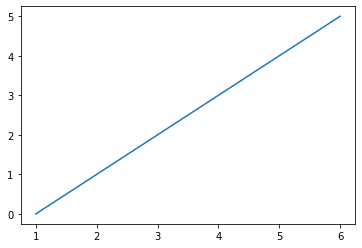

In [113]:
s.plot()

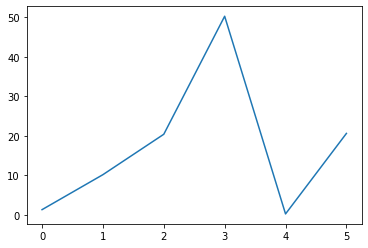

In [115]:
df2['Value'].plot()